In [ ]:
#Import necessary libraries and modules
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from scipy.ndimage import gaussian_filter
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Set random seed for reproducibility
tf.random.set_seed(43)

In [ ]:
#Define hyperparameters
image_size = (224, 224)
batch_size = 32
num_epochs = 10
learning_rate = 1e-3
num_classes = 4

In [ ]:
#Load the pre-trained ViT model
vit_model = hub.KerasLayer('https://tfhub.dev/sayakpaul/vit_b32_classification/1', trainable=False)

In [ ]:
#Modify the model's head for classification
inputs = tf.keras.Input(shape=(image_size[0], image_size[1], 3))
x = vit_model(inputs)
x = tf.keras.layers.Flatten()(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
#Compile the model
model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Load and prepare the dataset
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Dataset_Processed/Training',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Dataset_Processed/Validation',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 4919 images belonging to 4 classes.
Found 1052 images belonging to 4 classes.


In [ ]:
#Train the model
model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
154/154 [==============================] - 1215s 8s/step - loss: 0.6587 - accuracy: 0.7473 - val_loss: 0.4399 - val_accuracy: 0.8279
Epoch 2/10
154/154 [==============================] - 673s 4s/step - loss: 0.3904 - accuracy: 0.8583 - val_loss: 0.3520 - val_accuracy: 0.8679
Epoch 3/10
154/154 [==============================] - 707s 5s/step - loss: 0.3204 - accuracy: 0.8805 - val_loss: 0.3419 - val_accuracy: 0.8764
Epoch 4/10
154/154 [==============================] - 683s 4s/step - loss: 0.3061 - accuracy: 0.8857 - val_loss: 0.3304 - val_accuracy: 0.8698
Epoch 5/10
154/154 [==============================] - 680s 4s/step - loss: 0.2675 - accuracy: 0.8982 - val_loss: 0.3402 - val_accuracy: 0.8669
Epoch 6/10
154/154 [==============================] - 676s 4s/step - loss: 0.2520 - accuracy: 0.9077 - val_loss: 0.2871 - val_accuracy: 0.9011
Epoch 7/10
154/154 [==============================] - 697s 5s/step - loss: 0.2362 - accuracy: 0.9081 - val_loss: 0.2893 - val_accuracy: 0.896

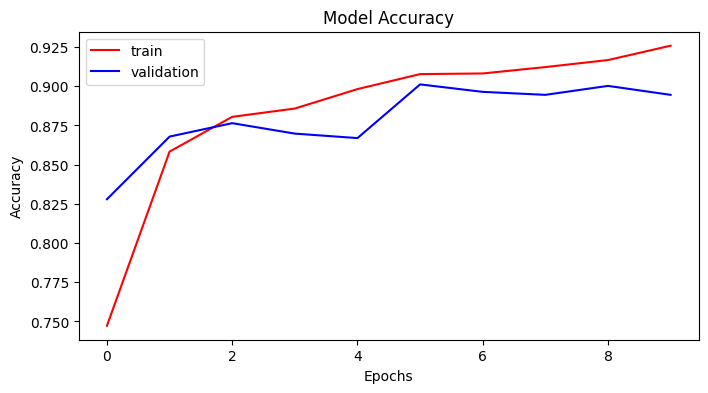

In [ ]:
#Accuracy plot
plt.figure(figsize=(8,4))
plt.plot(model.history.history['accuracy'], color='r')
plt.plot(model.history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

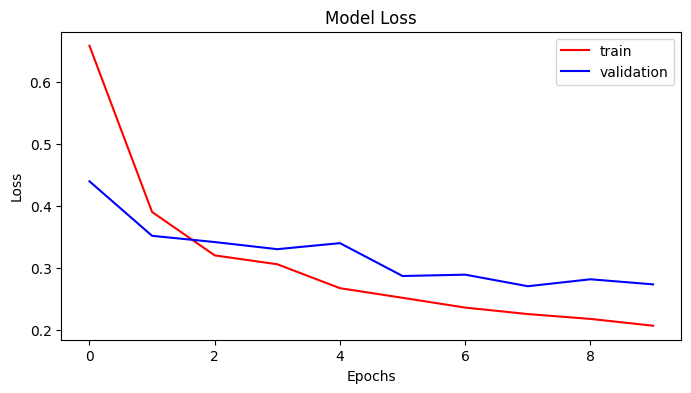

In [ ]:
#Loss plot
plt.figure(figsize=(8,4))
plt.plot(model.history.history['loss'], color='r')
plt.plot(model.history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
#Save the model
model.save('/content/drive/MyDrive/brain_tumor_classification_model_processedlast.tf')

In [ ]:
#Load the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/brain_tumor_classification_model_processedlast.tf')

In [ ]:
#Load test dataset
datagen = ImageDataGenerator(rescale=1/255)
test_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Dataset_Processed/Testing',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1052 images belonging to 4 classes.


In [ ]:
#Evaluate the model on test set
true_labels = test_generator.classes
predictions = loaded_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))

test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

33/33 [==============================] - 530s 16s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.19      0.19       243
           1       0.19      0.16      0.18       246
           2       0.30      0.31      0.31       300
           3       0.25      0.28      0.26       263

    accuracy                           0.24      1052
   macro avg       0.23      0.24      0.24      1052
weighted avg       0.24      0.24      0.24      1052

Confusion Matrix:
[[46 52 70 75]
 [56 40 80 70]
 [67 57 94 82]
 [62 62 65 74]]
33/33 [==============================] - 4s 107ms/step - loss: 0.2937 - accuracy: 0.8859
Test Loss: 0.2937217056751251
Test Accuracy: 0.8859315514564514


In [ ]:
#Make predictions using the loaded model
predictions = loaded_model.predict('''input_image''')
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
predicted_class = class_labels[np.argmax(predictions)]
print("Predicted Class:", predicted_class)

1/1 [==============================] - 7s 7s/step
Predicted Class: glioma
